# Tensorflow GPU & CPU 

## Mac M2 Tutorial

Use this instructions to create a virtual env that supports m2 gpu.

 - conda create -n tensorflow python=3.8
 - conda activate tensorflow 
 - conda install -c apple tensorflow-deps
 - pip install tensorflow-macos==2.9.0
 - pip install tensorflow-metal==0.5.0

## Window Tutorial

## Implementation

### Libraries and Configurations

In [3]:
# Common Libraries
import matplotlib.pyplot as plt 
import numpy as np 

# Deep Learning
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import (Dense, Flatten)

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Dataset

In [5]:
mnist = keras.datasets.mnist
(X_train_full,y_train_full) , (X_test , y_test) = mnist.load_data()

X_val , X_train =  X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_val , y_train =  y_train_full[:5000]  , y_train_full[5000:] 

print(f'Train Shape: {X_train.shape}')
print(f'Val Shape: {X_val.shape}')
print(f'Test Shape: {X_test.shape}')

Train Shape: (55000, 28, 28)
Val Shape: (5000, 28, 28)
Test Shape: (10000, 28, 28)


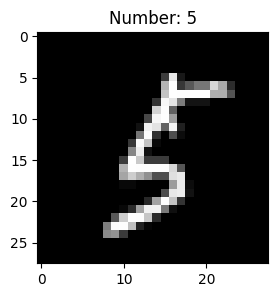

In [6]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[666], cmap = "gray")
plt.title(f"Number: {y_train[666]}")
plt.show()

### Training CPU/GPU:

In [7]:
def FFNN(input_size_x, input_size_y):
  model = Sequential(name='FFNN')
  model.add(Flatten(input_shape = (input_size_x, input_size_y, )))
  model.add(Dense(1000 , activation = "relu"))
  model.add(Dense(500 ,  activation = "relu"))
  model.add(Dense(10 ,  activation = "softmax"))
  model.summary()

  return model

In [8]:
input_size_x = 28
input_size_y = 28
model = FFNN(input_size_x, input_size_y)
model.compile("adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ["accuracy"])

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "FFNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 1,290,510
Trainable params: 1,290,510
Non-trainable params: 0
_________________________________________________________________


2024-01-02 18:54:55.688191: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-02 18:54:55.688341: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
%%time
with tf.device('/device:GPU:0'):
    model.fit(X_train, y_train.reshape((-1,1)) , epochs=3, batch_size=512)

Epoch 1/3
108/108 [==============================] - 1s 12ms/step - loss: 0.0416 - accuracy: 0.9870
Epoch 2/3
108/108 [==============================] - 1s 12ms/step - loss: 0.0270 - accuracy: 0.9920
Epoch 3/3
108/108 [==============================] - 1s 12ms/step - loss: 0.0184 - accuracy: 0.9947
CPU times: user 1.67 s, sys: 1.14 s, total: 2.8 s
Wall time: 3.98 s


In [12]:
%%time
with tf.device('/device:CPU:0'):
    model.fit(X_train, y_train.reshape((-1,1)) , epochs=3, batch_size=512)

Epoch 1/3
108/108 [==============================] - 2s 16ms/step - loss: 0.0056 - accuracy: 0.9985
Epoch 2/3
108/108 [==============================] - 2s 16ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 3/3
108/108 [==============================] - 2s 17ms/step - loss: 0.0015 - accuracy: 0.9998
CPU times: user 21.4 s, sys: 2.89 s, total: 24.3 s
Wall time: 5.41 s
